In [4]:
!pip install requests

!pip install beautifulsoup4 lxml





Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
url="https://www.bikewale.com/best-bikes-in-india/?pageNumber=1&pageSize=30"

In [7]:
req = requests.get(url)



In [8]:
req.status_code


200

In [9]:
res=req.text

In [10]:
soup = BeautifulSoup(res,"lxml")

In [11]:
soup.prettify()

'<!DOCTYPE html>\n<html itemscope="" itemtype="http://schema.org/WebPage" lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">\n <head>\n  <link as="font" crossorigin="" href="https://stc.aeplcdn.com/fonts/lato-bold.woff2" rel="preload" type="font/woff2"/>\n  <link as="font" crossorigin="" href="https://stc.aeplcdn.com/fonts/lato-regular.woff2" rel="preload" type="font/woff2"/>\n  <title data-react-helmet="true" itemprop="name">\n   Best Bikes in India - August 2025 | Top 10 Bikes - BikeWale\n  </title>\n  <link as="style" data-chunk="main-desktop" href="https://stb.aeplcdn.com/bikewale/UI/pwa/client-build-legacy/css/main-desktop-f861ba06.00ba0e6f42ce0a107dd8.css" rel="preload"/>\n  <link crossorigin="" href="https://imgd.aeplcdn.com" rel="preconnect dns-prefetch"/>\n  <link crossorigin="" href="https://stc.aeplcdn.com" rel="preconnect dns-prefetch"/>\n  <link crossorigin="" href="https://stb.aeplcdn.com" rel="preconnect dns-prefetch"/>\n  <link crossorigin="" href="https

1.NAME

In [12]:
all_bike_names = []
for page in range(1, 31):
    name_tags = soup.find_all("span", {'class': 'o-jJ o-j3 o-js o-ez'})
    for tag in name_tags:
        name=tag.text.strip()
        all_bike_names.append(name)
print(all_bike_names)

['Yezdi Roadster', 'KTM 160 Duke', 'Royal Enfield Hunter 350', 'Royal Enfield Classic 350', 'Royal Enfield Continental GT 650', 'Honda CB 125 Hornet', 'Yamaha MT 15 V2', 'Honda SP 125', 'Royal Enfield Bullet 350', 'Yamaha R15 V4', 'Hero Xtreme 125R', 'TVS Apache RTR 160', 'Bajaj Pulsar N160', 'TVS Raider 125', 'Hero Splendor Plus', 'Harley-Davidson X440', 'Bajaj Pulsar NS200', 'TVS Ronin', 'Bajaj Pulsar 125', 'Jawa 42 Bobber', 'Bajaj Pulsar NS125', 'KTM 200 Duke', 'Suzuki Access 125', 'Bajaj Pulsar NS400Z', 'Honda Activa', 'TVS Jupiter', 'Honda Shine', 'Hero HF Deluxe', 'Royal Enfield Guerrilla 450', 'Bajaj Pulsar 150', 'Yezdi Roadster', 'KTM 160 Duke', 'Royal Enfield Hunter 350', 'Royal Enfield Classic 350', 'Royal Enfield Continental GT 650', 'Honda CB 125 Hornet', 'Yamaha MT 15 V2', 'Honda SP 125', 'Royal Enfield Bullet 350', 'Yamaha R15 V4', 'Hero Xtreme 125R', 'TVS Apache RTR 160', 'Bajaj Pulsar N160', 'TVS Raider 125', 'Hero Splendor Plus', 'Harley-Davidson X440', 'Bajaj Pulsar N

2.PRICE

In [13]:
all_prices = []
for page in range(1, 31):
    price_tags = soup.find_all("span", class_="o-jJ o-jr o-j3 o-kJ")
    for tag in price_tags:
        all_prices.append(tag.text.strip())
print(all_prices)

['₹ 2,12,130', '₹ 1,85,195', '₹ 1,49,900', '₹ 1,97,253', '₹ 3,25,653', '₹ 1,12,000', '₹ 1,70,583', '₹ 94,221', '₹ 1,76,625', '₹ 1,85,644', '₹ 99,123', '₹ 1,18,142', '₹ 1,23,298', '₹ 90,094', '₹ 79,121', '₹ 2,39,500', '₹ 1,52,950', '₹ 1,35,551', '₹ 86,759', '₹ 2,11,877', '₹ 1,00,029', '₹ 2,07,299', '₹ 86,792', '₹ 1,92,938', '₹ 83,873', '₹ 81,853', '₹ 86,591', '₹ 59,416', '₹ 2,39,000', '₹ 1,17,241', '₹ 2,12,130', '₹ 1,85,195', '₹ 1,49,900', '₹ 1,97,253', '₹ 3,25,653', '₹ 1,12,000', '₹ 1,70,583', '₹ 94,221', '₹ 1,76,625', '₹ 1,85,644', '₹ 99,123', '₹ 1,18,142', '₹ 1,23,298', '₹ 90,094', '₹ 79,121', '₹ 2,39,500', '₹ 1,52,950', '₹ 1,35,551', '₹ 86,759', '₹ 2,11,877', '₹ 1,00,029', '₹ 2,07,299', '₹ 86,792', '₹ 1,92,938', '₹ 83,873', '₹ 81,853', '₹ 86,591', '₹ 59,416', '₹ 2,39,000', '₹ 1,17,241', '₹ 2,12,130', '₹ 1,85,195', '₹ 1,49,900', '₹ 1,97,253', '₹ 3,25,653', '₹ 1,12,000', '₹ 1,70,583', '₹ 94,221', '₹ 1,76,625', '₹ 1,85,644', '₹ 99,123', '₹ 1,18,142', '₹ 1,23,298', '₹ 90,094', '₹ 79,121

In [14]:
clean_price_list = []
for price in all_prices:
    clean_price = price.replace("₹", "").replace(",", "").strip()
    if clean_price.isdigit():
        clean_price_list.append(int(clean_price))

print(clean_price_list)


[212130, 185195, 149900, 197253, 325653, 112000, 170583, 94221, 176625, 185644, 99123, 118142, 123298, 90094, 79121, 239500, 152950, 135551, 86759, 211877, 100029, 207299, 86792, 192938, 83873, 81853, 86591, 59416, 239000, 117241, 212130, 185195, 149900, 197253, 325653, 112000, 170583, 94221, 176625, 185644, 99123, 118142, 123298, 90094, 79121, 239500, 152950, 135551, 86759, 211877, 100029, 207299, 86792, 192938, 83873, 81853, 86591, 59416, 239000, 117241, 212130, 185195, 149900, 197253, 325653, 112000, 170583, 94221, 176625, 185644, 99123, 118142, 123298, 90094, 79121, 239500, 152950, 135551, 86759, 211877, 100029, 207299, 86792, 192938, 83873, 81853, 86591, 59416, 239000, 117241, 212130, 185195, 149900, 197253, 325653, 112000, 170583, 94221, 176625, 185644, 99123, 118142, 123298, 90094, 79121, 239500, 152950, 135551, 86759, 211877, 100029, 207299, 86792, 192938, 83873, 81853, 86591, 59416, 239000, 117241, 212130, 185195, 149900, 197253, 325653, 112000, 170583, 94221, 176625, 185644, 

3.BHP

In [15]:
all_bhp = []
for page in range(1, 31):
    spec_tags = soup.find_all("span", class_="o-jK")
    for tag in spec_tags:
        text = tag.text.strip()
        if "bhp" in text:
            all_bhp.append(text.replace('bhp','').strip())
print(all_bhp)

['28.7', '18.73', '20.2', '20.2', '47', '10.99', '18.1', '10.72', '20.2', '18.1', '11.4', '15.82', '15.68', '11.2', '7.91', '27', '24.13', '20.1', '11.64', '29.51', '11.8', '24.67', '8.3', '42.37', '7.88', '7.91', '10.59', '7.91', '39.47', '13.8', '28.7', '18.73', '20.2', '20.2', '47', '10.99', '18.1', '10.72', '20.2', '18.1', '11.4', '15.82', '15.68', '11.2', '7.91', '27', '24.13', '20.1', '11.64', '29.51', '11.8', '24.67', '8.3', '42.37', '7.88', '7.91', '10.59', '7.91', '39.47', '13.8', '28.7', '18.73', '20.2', '20.2', '47', '10.99', '18.1', '10.72', '20.2', '18.1', '11.4', '15.82', '15.68', '11.2', '7.91', '27', '24.13', '20.1', '11.64', '29.51', '11.8', '24.67', '8.3', '42.37', '7.88', '7.91', '10.59', '7.91', '39.47', '13.8', '28.7', '18.73', '20.2', '20.2', '47', '10.99', '18.1', '10.72', '20.2', '18.1', '11.4', '15.82', '15.68', '11.2', '7.91', '27', '24.13', '20.1', '11.64', '29.51', '11.8', '24.67', '8.3', '42.37', '7.88', '7.91', '10.59', '7.91', '39.47', '13.8', '28.7', '18

4.CCTAG

In [16]:
all_cc = []
for page in range(1, 31):
    spec_tags = soup.find_all("span", {'class': 'o-jK'})
    for tag in spec_tags:
        text = tag.text.strip()
        if "cc" in text:
            all_cc.append(text.replace('cc','').strip())
print(all_cc)




['334', '164.2', '349.34', '349', '648', '123.94', '155', '123.94', '349', '155', '124.7', '159.7', '164.82', '124.8', '97.2', '440', '199.5', '225.9', '124.4', '334', '124.45', '199.5', '124', '373', '109.51', '113.3', '123.94', '97.2', '452', '149.5', '334', '164.2', '349.34', '349', '648', '123.94', '155', '123.94', '349', '155', '124.7', '159.7', '164.82', '124.8', '97.2', '440', '199.5', '225.9', '124.4', '334', '124.45', '199.5', '124', '373', '109.51', '113.3', '123.94', '97.2', '452', '149.5', '334', '164.2', '349.34', '349', '648', '123.94', '155', '123.94', '349', '155', '124.7', '159.7', '164.82', '124.8', '97.2', '440', '199.5', '225.9', '124.4', '334', '124.45', '199.5', '124', '373', '109.51', '113.3', '123.94', '97.2', '452', '149.5', '334', '164.2', '349.34', '349', '648', '123.94', '155', '123.94', '349', '155', '124.7', '159.7', '164.82', '124.8', '97.2', '440', '199.5', '225.9', '124.4', '334', '124.45', '199.5', '124', '373', '109.51', '113.3', '123.94', '97.2', '45

5.WEIGHT

In [17]:
all_weights = []
for page in range(1, 31):
    spec_tags = soup.find_all("span", {'class': 'o-jK'})
    for tag in spec_tags:
        text = tag.text.strip()
        if "kg" in text:
            all_weights.append(text.replace("kg", "").strip())
print(all_weights)


['194', '147', '181', '195', '211', '124', '141', '117', '195', '141', '136', '138', '154', '123', '112', '190.5', '158', '160', '140', '185', '144', '159', '105', '174', '105', '106', '113', '112', '185', '148', '194', '147', '181', '195', '211', '124', '141', '117', '195', '141', '136', '138', '154', '123', '112', '190.5', '158', '160', '140', '185', '144', '159', '105', '174', '105', '106', '113', '112', '185', '148', '194', '147', '181', '195', '211', '124', '141', '117', '195', '141', '136', '138', '154', '123', '112', '190.5', '158', '160', '140', '185', '144', '159', '105', '174', '105', '106', '113', '112', '185', '148', '194', '147', '181', '195', '211', '124', '141', '117', '195', '141', '136', '138', '154', '123', '112', '190.5', '158', '160', '140', '185', '144', '159', '105', '174', '105', '106', '113', '112', '185', '148', '194', '147', '181', '195', '211', '124', '141', '117', '195', '141', '136', '138', '154', '123', '112', '190.5', '158', '160', '140', '185', '144', '1

6.RATING

In [18]:
all_ratings = []
for page in range(1, 31):
    spec_tags=soup.find_all("span",{'class':"o-jL o-f7 o-j0 o-jc o-fE"})
    for tag in spec_tags:
        rating = tag.text.strip()
        all_ratings.append(rating)    
print(all_ratings)



['5 Ratings', '101 Ratings', '146 Ratings', '253 Ratings', '6 Ratings', '267 Ratings', '792 Ratings', '195 Ratings', '226 Ratings', '243 Ratings', '856 Ratings', '200 Ratings', '551 Ratings', '1020 Ratings', '112 Ratings', '945 Ratings', '218 Ratings', '336 Ratings', '64 Ratings', '136 Ratings', '96 Ratings', '87 Ratings', '83 Ratings', '715 Ratings', '144 Ratings', '1069 Ratings', '803 Ratings', '45 Ratings', '1389 Ratings', '5 Ratings', '101 Ratings', '146 Ratings', '253 Ratings', '6 Ratings', '267 Ratings', '792 Ratings', '195 Ratings', '226 Ratings', '243 Ratings', '856 Ratings', '200 Ratings', '551 Ratings', '1020 Ratings', '112 Ratings', '945 Ratings', '218 Ratings', '336 Ratings', '64 Ratings', '136 Ratings', '96 Ratings', '87 Ratings', '83 Ratings', '715 Ratings', '144 Ratings', '1069 Ratings', '803 Ratings', '45 Ratings', '1389 Ratings', '5 Ratings', '101 Ratings', '146 Ratings', '253 Ratings', '6 Ratings', '267 Ratings', '792 Ratings', '195 Ratings', '226 Ratings', '243 Ratin

7.KMPL

In [19]:
all_kmpls = []
for page in range(1, 31):
    spec_tags = soup.find_all("span", class_='o-jK')
    for tag in spec_tags:
        text = tag.text.strip()
        if "kmpl" in text:
            all_kmpls.append(text.replace("kmpl", "").strip())
print(all_kmpls)

    

['31', '36.5', '36.2', '35', '25', '54', '48', '63', '35', '51.4', '66', '61', '51.6', '56.7', '62', '35', '36', '42', '50', '30', '46.9', '35', '47', '33', '47', '53.84', '55', '65', '29', '48', '31', '36.5', '36.2', '35', '25', '54', '48', '63', '35', '51.4', '66', '61', '51.6', '56.7', '62', '35', '36', '42', '50', '30', '46.9', '35', '47', '33', '47', '53.84', '55', '65', '29', '48', '31', '36.5', '36.2', '35', '25', '54', '48', '63', '35', '51.4', '66', '61', '51.6', '56.7', '62', '35', '36', '42', '50', '30', '46.9', '35', '47', '33', '47', '53.84', '55', '65', '29', '48', '31', '36.5', '36.2', '35', '25', '54', '48', '63', '35', '51.4', '66', '61', '51.6', '56.7', '62', '35', '36', '42', '50', '30', '46.9', '35', '47', '33', '47', '53.84', '55', '65', '29', '48', '31', '36.5', '36.2', '35', '25', '54', '48', '63', '35', '51.4', '66', '61', '51.6', '56.7', '62', '35', '36', '42', '50', '30', '46.9', '35', '47', '33', '47', '53.84', '55', '65', '29', '48', '31', '36.5', '36.2', '3

In [20]:
print("Bike Names:", len(all_bike_names))
print("Prices:", len(clean_price_list))
print("BHP:", len(all_bhp))
print("CC:", len(all_cc))
print("Weight:", len(all_weights))
print("Mileage:", len(all_kmpls))
print("Rating:", len(all_ratings))


Bike Names: 900
Prices: 900
BHP: 900
CC: 900
Weight: 900
Mileage: 900
Rating: 870


In [21]:
def pad_list(lst, target_length):
    return lst + ["NA"] * (target_length - len(lst))


In [22]:
max_length = max(
    len(all_bike_names), len(clean_price_list), len(all_bhp),
    len(all_cc), len(all_weights), len(all_kmpls), len(all_ratings)
)
all_bike_names = pad_list(all_bike_names, max_length)
clean_price_list = pad_list(clean_price_list, max_length)
all_bhp = pad_list(all_bhp, max_length)
all_cc = pad_list(all_cc, max_length)
all_weights = pad_list(all_weights, max_length)
all_kmpls = pad_list(all_kmpls, max_length)
all_ratings = pad_list(all_ratings, max_length)


In [23]:
data = pd.DataFrame({
    "Bike Name": all_bike_names,
    "Ex-Showroom Price": clean_price_list,
    "BHP": all_bhp,
    "CC": all_cc,
    "Weight": all_weights,
    "Mileage": all_kmpls,
    "Rating": all_ratings
})


In [24]:
def pad_list(lst, target_length):
    return lst + ["NA"] * (target_length - len(lst))
max_length = max(
    len(all_bike_names), len(clean_price_list), len(all_bhp),
    len(all_cc), len(all_weights), len(all_kmpls), len(all_ratings)
)
all_bike_names = pad_list(all_bike_names, max_length)
clean_price_list = pad_list(clean_price_list, max_length)
all_bhp = pad_list(all_bhp, max_length)
all_cc = pad_list(all_cc, max_length)
all_weights = pad_list(all_weights, max_length)
all_kmpls = pad_list(all_kmpls, max_length)
all_ratings = pad_list(all_ratings, max_length)
data = pd.DataFrame({
    "Bike Name": all_bike_names,
    "Ex-Showroom Price": clean_price_list,
    "BHP": all_bhp,
    "CC": all_cc,
    "Weight": all_weights,
    "Mileage": all_kmpls,
    "Rating": all_ratings
})
data.to_excel("best_bikes_data.xlsx", index=False)
print("Data exported to Excel successfully!")

Data exported to Excel successfully!


DATAFRAME

In [25]:
import pandas as pd
file_path = 'best_bikes_data.xlsx'  
df = pd.read_excel(file_path)
df


,Bike Name,Ex-Showroom Price,BHP,CC,Weight,Mileage,Rating
0,Yezdi Roadster,212130,28.70,334.00,194.0,31.00,5 Ratings
1,KTM 160 Duke,185195,18.73,164.20,147.0,36.50,101 Ratings
2,Royal Enfield Hunter 350,149900,20.20,349.34,181.0,36.20,146 Ratings
3,Royal Enfield Classic 350,197253,20.20,349.00,195.0,35.00,253 Ratings
4,Royal Enfield Continental GT 650,325653,47.00,648.00,211.0,25.00,6 Ratings
...,...,...,...,...,...,...,...
895,TVS Jupiter,81853,7.91,113.30,106.0,53.84,NaN
896,Honda Shine,86591,10.59,123.94,113.0,55.00,NaN
897,Hero HF Deluxe,59416,7.91,97.20,112.0,65.00,NaN
898,Royal Enfield Guerrilla 450,239000,39.47,452.00,185.0,29.00,NaN


DATA CLEANING

In [26]:
df.head()

,Bike Name,Ex-Showroom Price,BHP,CC,Weight,Mileage,Rating
0,Yezdi Roadster,212130,28.70,334.00,194.0,31.0,5 Ratings
1,KTM 160 Duke,185195,18.73,164.20,147.0,36.5,101 Ratings
2,Royal Enfield Hunter 350,149900,20.20,349.34,181.0,36.2,146 Ratings
3,Royal Enfield Classic 350,197253,20.20,349.00,195.0,35.0,253 Ratings
4,Royal Enfield Continental GT 650,325653,47.00,648.00,211.0,25.0,6 Ratings


In [27]:
df.tail()

,Bike Name,Ex-Showroom Price,BHP,CC,Weight,Mileage,Rating
895,TVS Jupiter,81853,7.91,113.30,106.0,53.84,NaN
896,Honda Shine,86591,10.59,123.94,113.0,55.00,NaN
897,Hero HF Deluxe,59416,7.91,97.20,112.0,65.00,NaN
898,Royal Enfield Guerrilla 450,239000,39.47,452.00,185.0,29.00,NaN
899,Bajaj Pulsar 150,117241,13.80,149.50,148.0,48.00,NaN


In [28]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].astype(float).mean())


In [29]:
df.dropna(subset=['Mileage'], inplace=True)


In [30]:
df.dropna(subset=['Rating'],inplace=True)

In [31]:
print(df.isnull().sum()) 

Bike Name            0
Ex-Showroom Price    0
BHP                  0
CC                   0
Weight               0
Mileage              0
Rating               0
dtype: int64


In [32]:
df.describe()

,Ex-Showroom Price,BHP,CC,Weight,Mileage
count,870.000000,870.000000,870.000000,870.000000,870.000000
mean,146688.366667,18.734333,220.428000,149.783333,45.504667
std,62126.018026,10.276641,133.739386,31.099406,11.694630
min,59416.000000,7.880000,97.200000,105.000000,25.000000
25%,90094.000000,10.990000,124.000000,123.000000,35.000000
50%,129424.500000,16.960000,157.350000,145.500000,47.000000
75%,192938.000000,24.130000,334.000000,181.000000,54.000000
max,325653.000000,47.000000,648.000000,211.000000,66.000000


observation

C:\Users\PrasadMennuli\AppData\Local\Temp\ipykernel_11328\4008848236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ex-Showroom Price', y='Bike Name', data=df, palette='viridis')


<Axes: xlabel='Ex-Showroom Price', ylabel='Bike Name'>

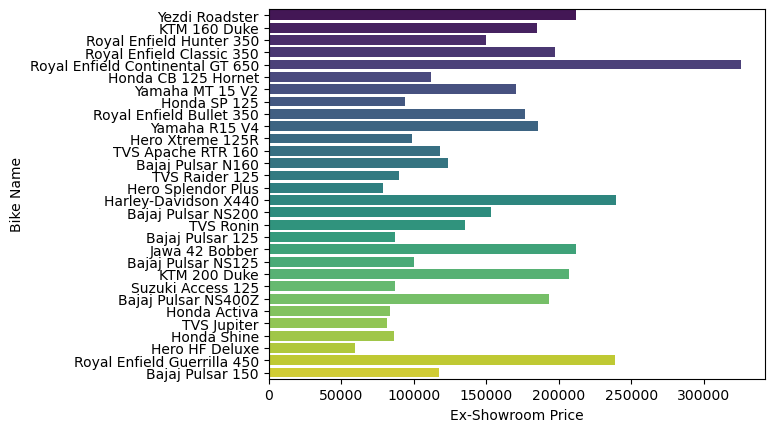

In [33]:
import seaborn as sns
sns.barplot(x='Ex-Showroom Price', y='Bike Name', data=df, palette='viridis')

<Axes: xlabel='Mileage', ylabel='CC'>

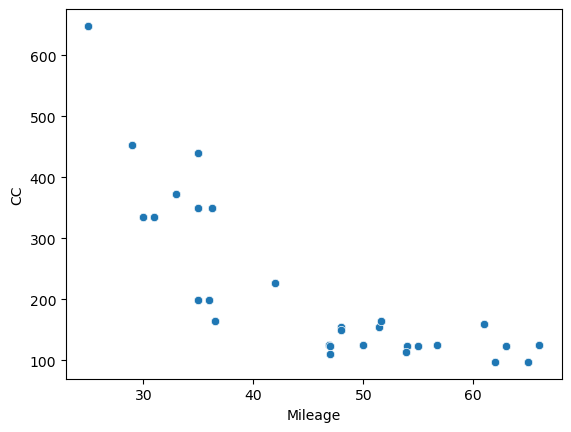

In [35]:
sns.scatterplot(x='Mileage', y='CC', data=df)

<Axes: xlabel='Mileage', ylabel='Count'>

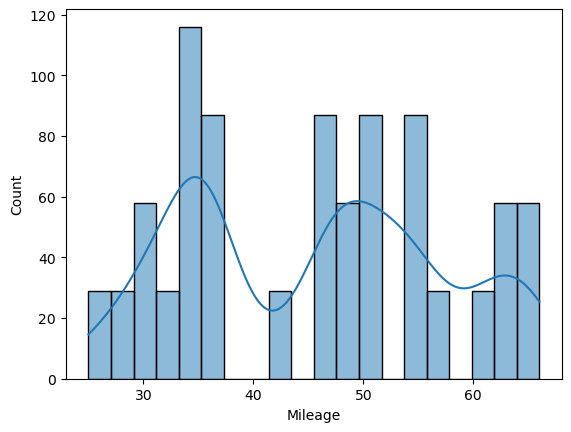

In [36]:
sns.histplot(df['Mileage'], bins=20, kde=True)

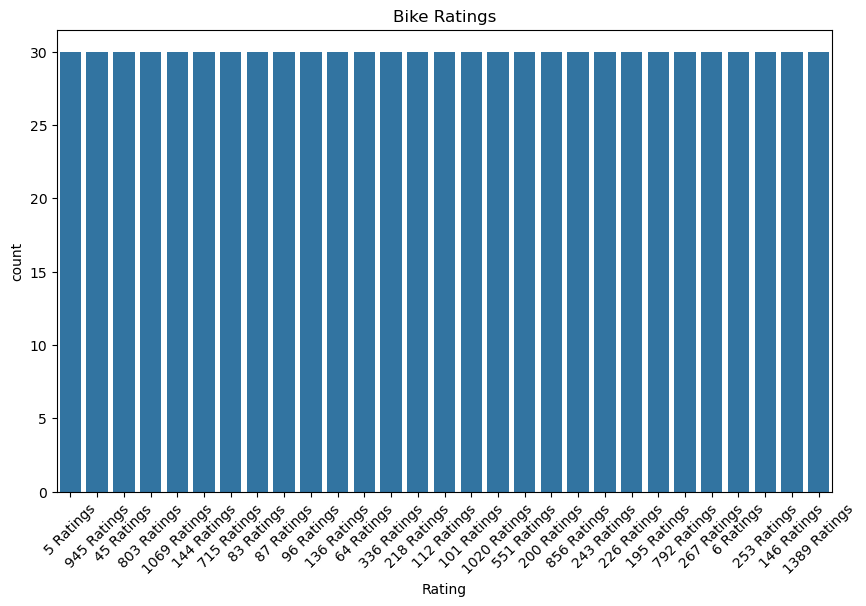

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index)
plt.title("Bike Ratings")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='CC', ylabel='BHP'>

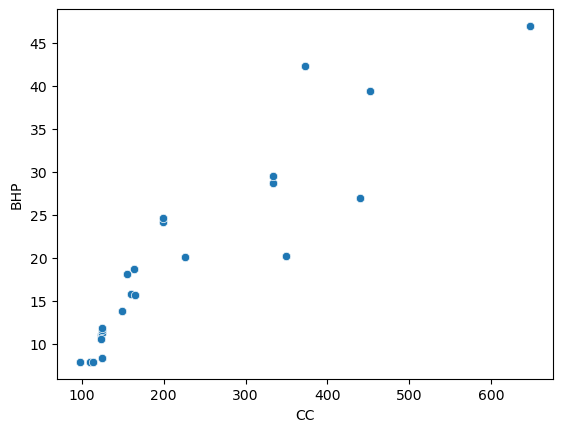

In [38]:
sns.scatterplot(x=pd.to_numeric(df['CC'], errors='coerce'),
                y=pd.to_numeric(df['BHP'], errors='coerce'))

In [39]:
df.columns

Index(['Bike Name', 'Ex-Showroom Price', 'BHP', 'CC', 'Weight', 'Mileage',
       'Rating'],
      dtype='object')

<Axes: >

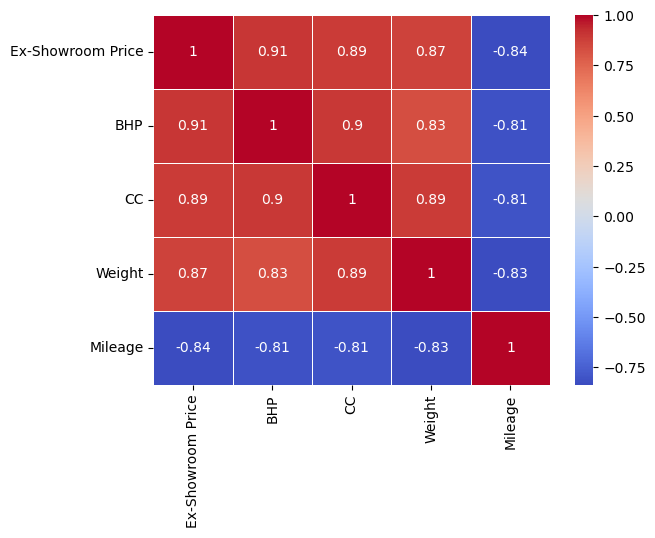

In [40]:
corr = df[['Ex-Showroom Price', 'BHP', 'CC', 'Weight', 'Mileage']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: ylabel='BHP'>

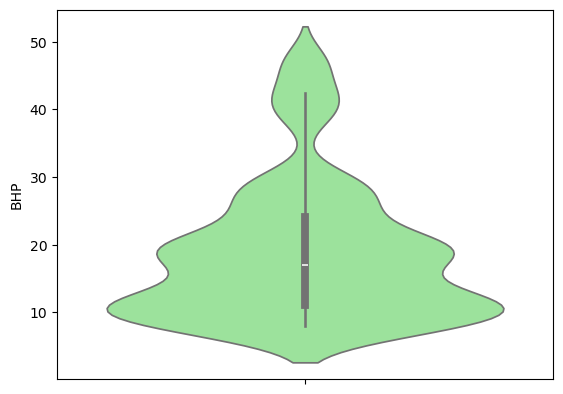

In [41]:

sns.violinplot(y=df["BHP"], color="lightgreen")



# Univariate_Analysis

<Axes: ylabel='Ex-Showroom Price'>

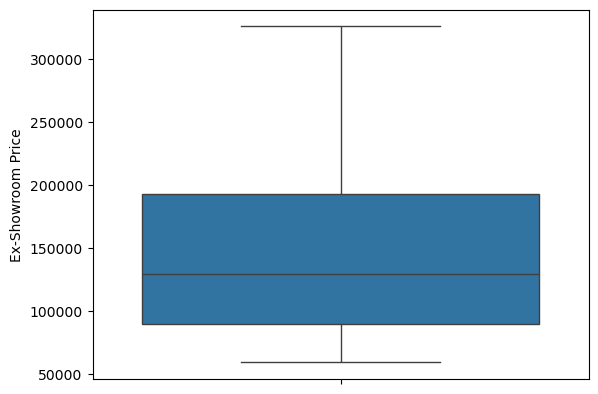

In [42]:
sns.boxplot(df['Ex-Showroom Price'])


<Axes: xlabel='Mileage', ylabel='Count'>

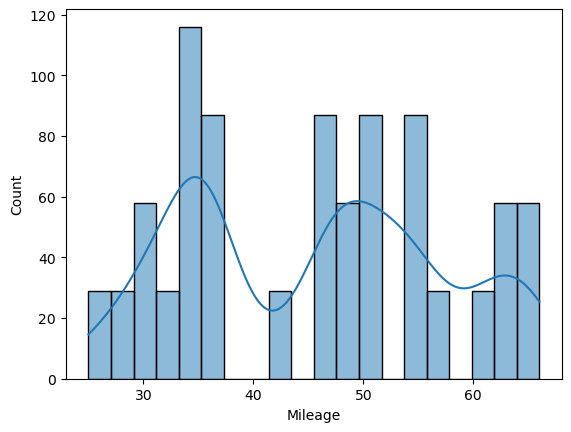

In [43]:
sns.histplot(df['Mileage'], bins=20, kde=True)


observation

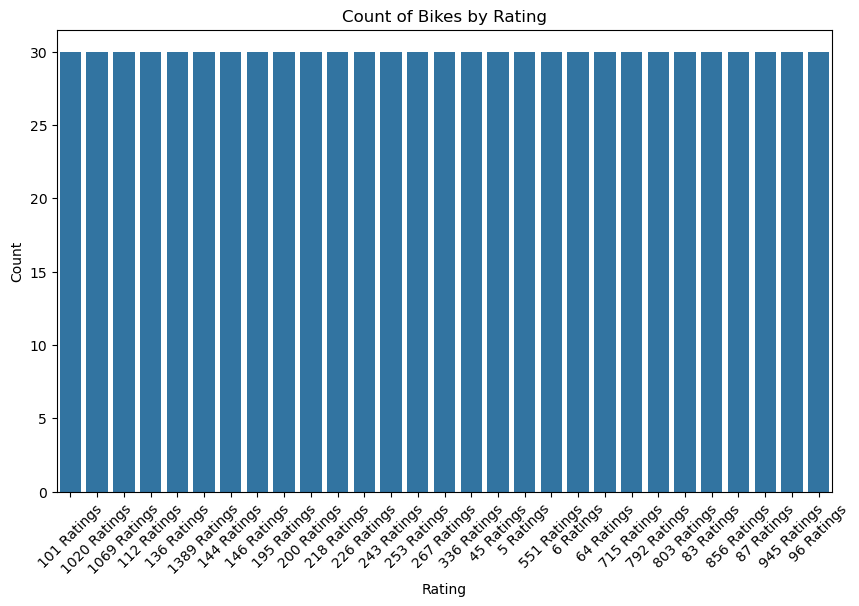

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=df, order=sorted(df['Rating'].unique()))
plt.xticks(rotation=45)  # Rotate labels to avoid merging
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Count of Bikes by Rating")
plt.show()


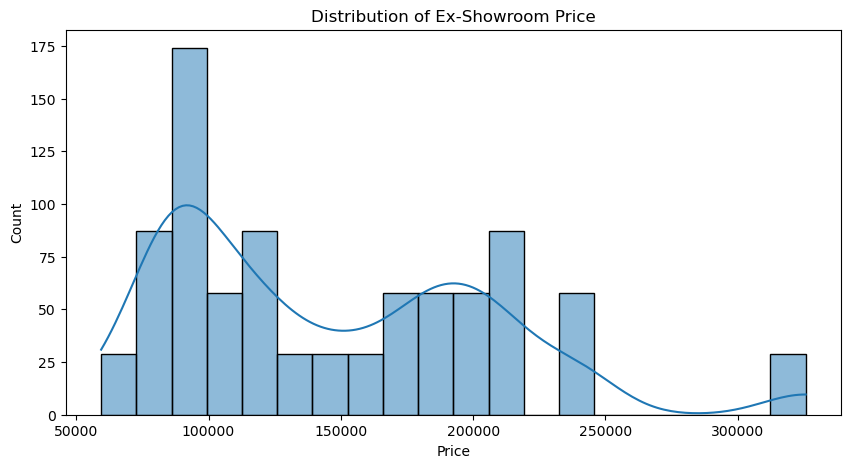

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['Ex-Showroom Price'], kde=True, bins=20)
plt.title("Distribution of Ex-Showroom Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


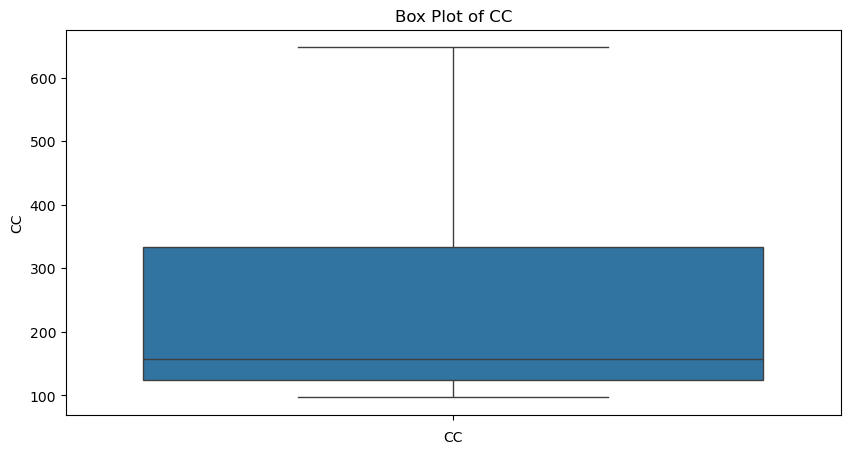

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['CC'])
plt.title("Box Plot of CC")
plt.xlabel("CC")
plt.show()


observation

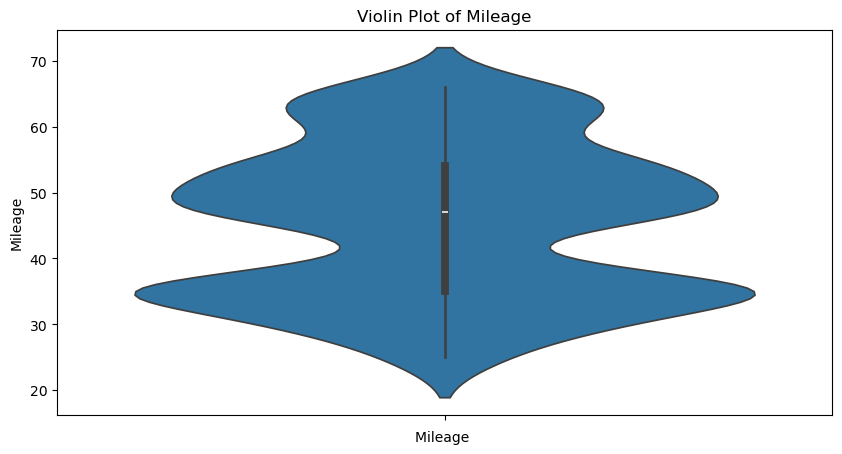

In [47]:

plt.figure(figsize=(10, 5))
sns.violinplot(y=df['Mileage'])
plt.title("Violin Plot of Mileage")
plt.xlabel("Mileage ")
plt.show()


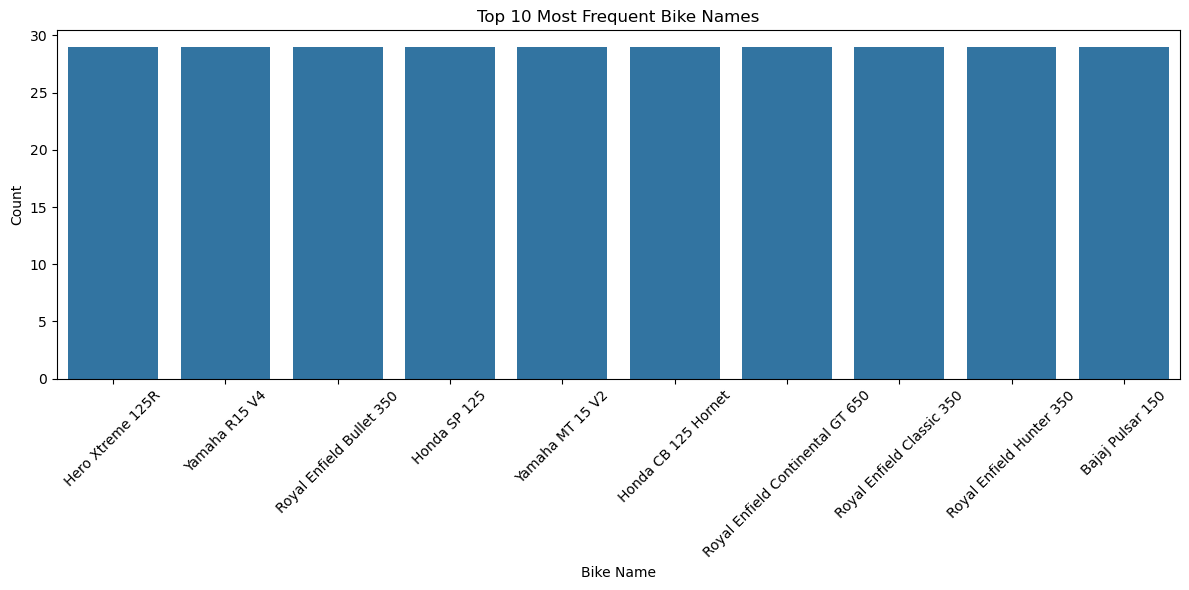

In [48]:
plt.figure(figsize=(12, 6))
top_names = df['Bike Name'].value_counts().tail(10)
sns.barplot(x=top_names.index, y=top_names.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Bike Names")
plt.xlabel("Bike Name")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


observation

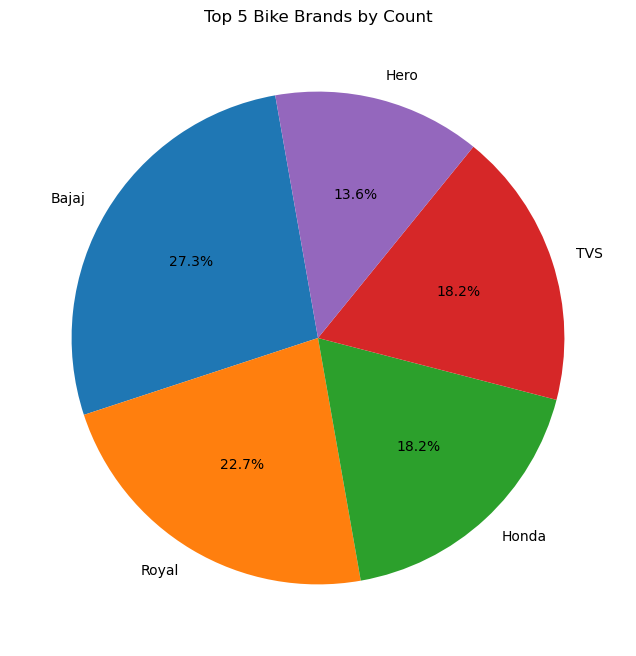

In [49]:
import matplotlib.pyplot as plt
df['Brand'] = df['Bike Name'].apply(lambda x: x.split()[0])
top_brands = df['Brand'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=100)
plt.title('Top 5 Bike Brands by Count')
plt.show()


In [50]:
df.describe()


,Ex-Showroom Price,BHP,CC,Weight,Mileage
count,870.000000,870.000000,870.000000,870.000000,870.000000
mean,146688.366667,18.734333,220.428000,149.783333,45.504667
std,62126.018026,10.276641,133.739386,31.099406,11.694630
min,59416.000000,7.880000,97.200000,105.000000,25.000000
25%,90094.000000,10.990000,124.000000,123.000000,35.000000
50%,129424.500000,16.960000,157.350000,145.500000,47.000000
75%,192938.000000,24.130000,334.000000,181.000000,54.000000
max,325653.000000,47.000000,648.000000,211.000000,66.000000


# Bi_VariateAnalysis

observation

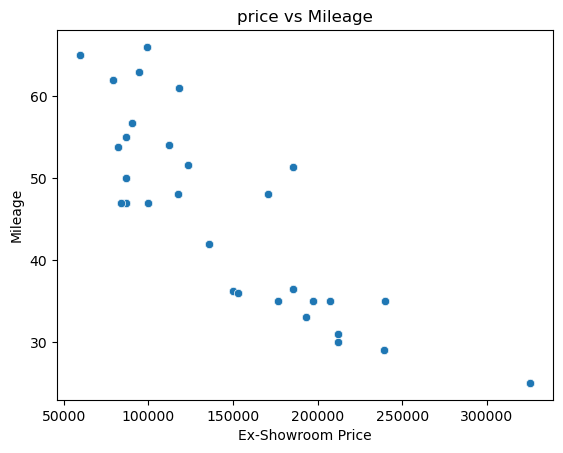

In [51]:
sns.scatterplot(x='Ex-Showroom Price', y='Mileage', data=df)
plt.title('price vs Mileage')
plt.show()


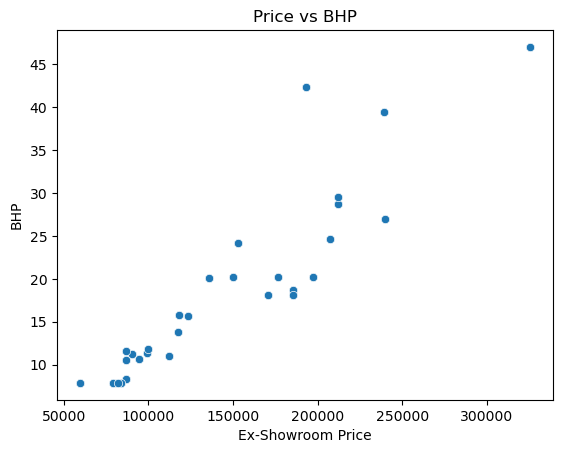

In [52]:
sns.scatterplot(x='Ex-Showroom Price', y='BHP', data=df)
plt.title("Price vs BHP")
plt.show()


In [53]:
df.columns

Index(['Bike Name', 'Ex-Showroom Price', 'BHP', 'CC', 'Weight', 'Mileage',
       'Rating', 'Brand'],
      dtype='object')

observation

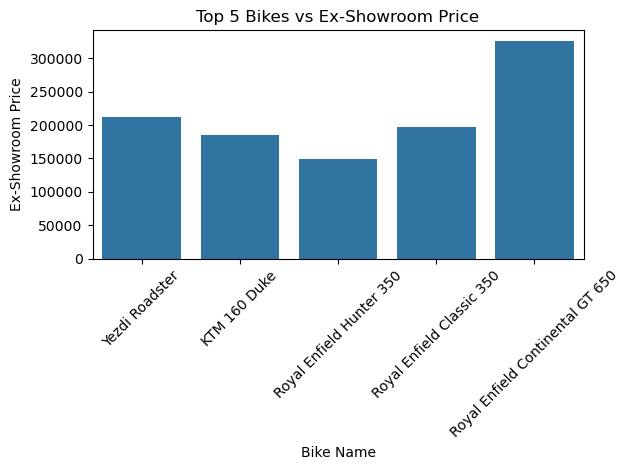

In [54]:
sns.barplot(x=df['Bike Name'][0:5], y=df['Ex-Showroom Price'][0:5])
plt.xticks(rotation=45) 
plt.title("Top 5 Bikes vs Ex-Showroom Price")
plt.xlabel("Bike Name")
plt.ylabel("Ex-Showroom Price")
plt.tight_layout()
plt.show()


observation

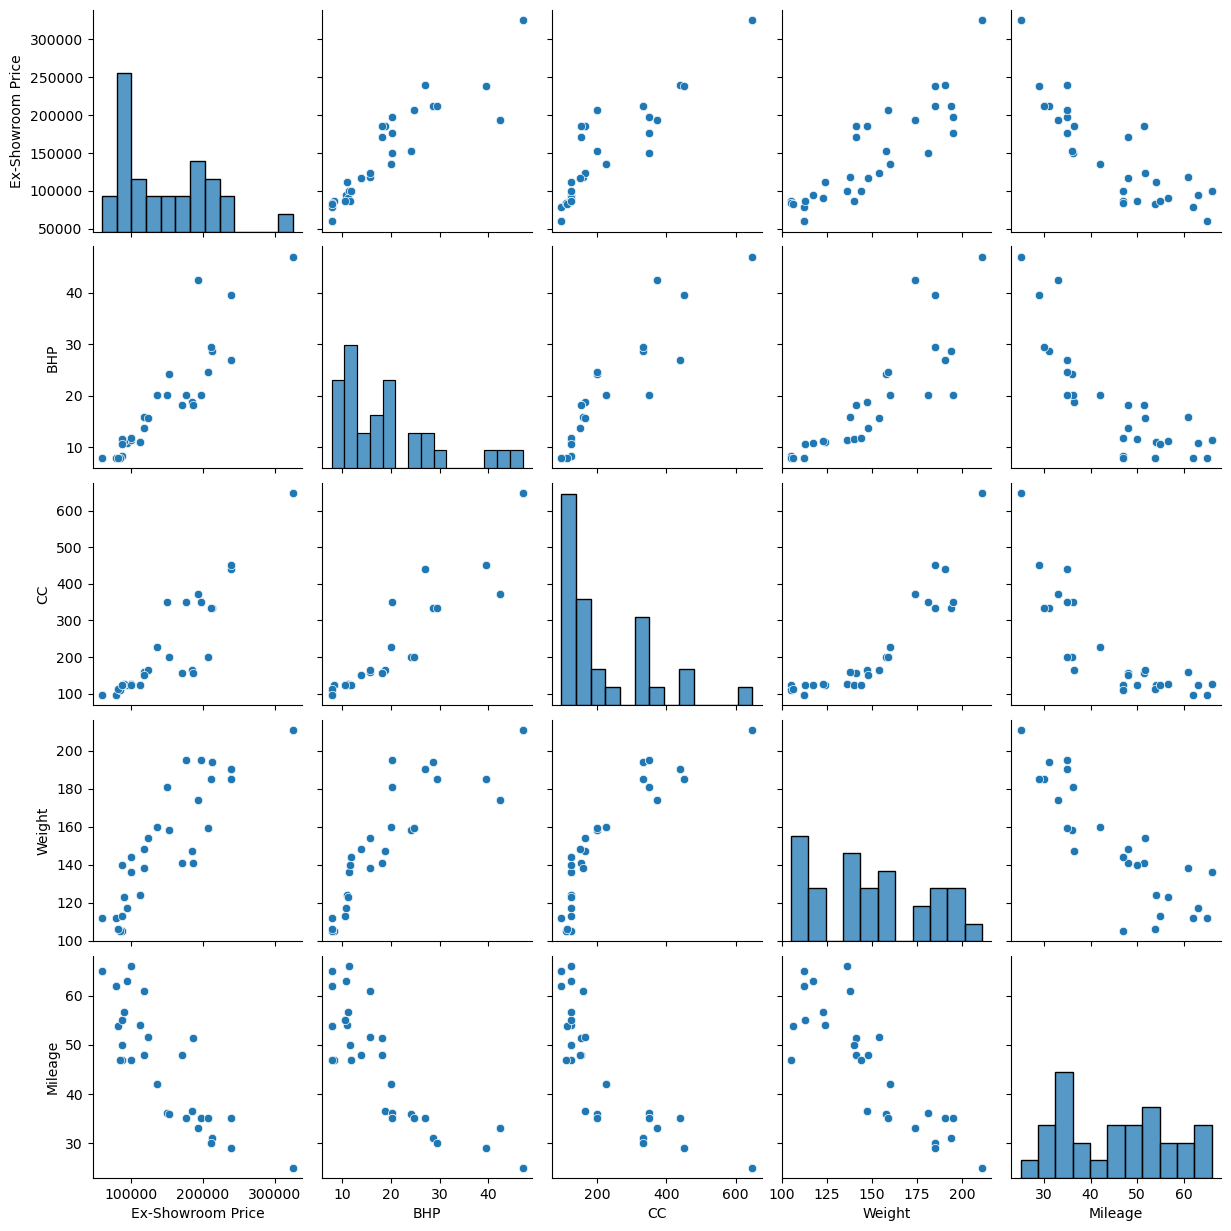

In [55]:
sns.pairplot(df[['Ex-Showroom Price', 'BHP', 'CC', 'Weight', 'Mileage']])
plt.show()


<Axes: xlabel='Mileage', ylabel='CC'>

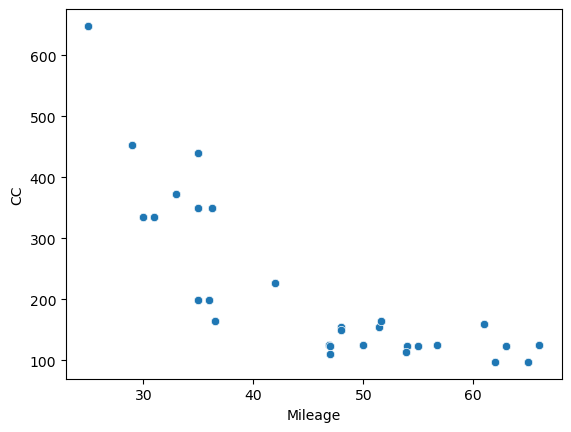

In [56]:
sns.scatterplot(data=df, x='Mileage', y='CC')

observation

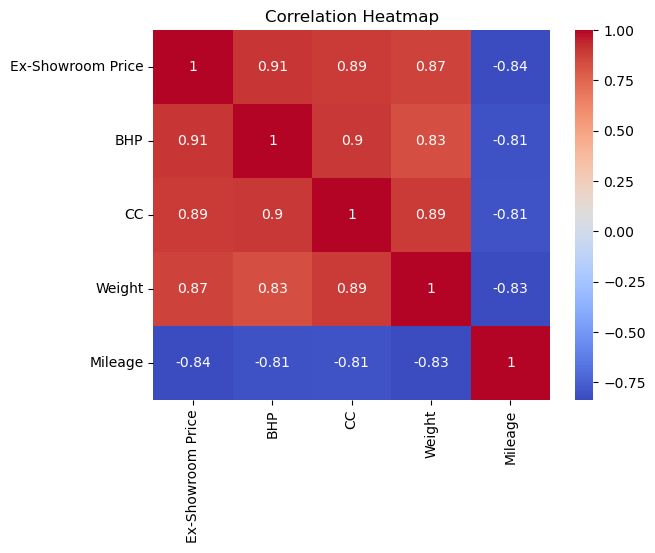

In [57]:

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


STATISTICAL ANALYSIS

In [58]:
df.describe()

,Ex-Showroom Price,BHP,CC,Weight,Mileage
count,870.000000,870.000000,870.000000,870.000000,870.000000
mean,146688.366667,18.734333,220.428000,149.783333,45.504667
std,62126.018026,10.276641,133.739386,31.099406,11.694630
min,59416.000000,7.880000,97.200000,105.000000,25.000000
25%,90094.000000,10.990000,124.000000,123.000000,35.000000
50%,129424.500000,16.960000,157.350000,145.500000,47.000000
75%,192938.000000,24.130000,334.000000,181.000000,54.000000
max,325653.000000,47.000000,648.000000,211.000000,66.000000


In [59]:
df['BHP'].mean()

18.734333333333332

In [60]:
df.mean(numeric_only=True)

Ex-Showroom Price    146688.366667
BHP                      18.734333
CC                      220.428000
Weight                  149.783333
Mileage                  45.504667
dtype: float64

In [61]:
 df.median(numeric_only=True)

Ex-Showroom Price    129424.50
BHP                      16.96
CC                      157.35
Weight                  145.50
Mileage                  47.00
dtype: float64

In [62]:
 df.mode(numeric_only=True).iloc[0]

Ex-Showroom Price    59416.00
BHP                      7.91
CC                     123.94
Weight                 105.00
Mileage                 35.00
Name: 0, dtype: float64

In [63]:
df.std(numeric_only=True)

Ex-Showroom Price    62126.018026
BHP                     10.276641
CC                     133.739386
Weight                  31.099406
Mileage                 11.694630
dtype: float64

In [64]:
df.var(numeric_only=True)

Ex-Showroom Price    3.859642e+09
BHP                  1.056094e+02
CC                   1.788622e+04
Weight               9.671731e+02
Mileage              1.367644e+02
dtype: float64

In [65]:
df.corr(numeric_only=True)

,Ex-Showroom Price,BHP,CC,Weight,Mileage
Ex-Showroom Price,1.000000,0.906141,0.889624,0.867066,-0.836935
BHP,0.906141,1.000000,0.895813,0.829285,-0.813942
CC,0.889624,0.895813,1.000000,0.891460,-0.808090
Weight,0.867066,0.829285,0.891460,1.000000,-0.830446
Mileage,-0.836935,-0.813942,-0.808090,-0.830446,1.000000


CONCLUSION